![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [58]:
# Start your code here!
import pandas as pd

women = pd.read_csv("women_results.csv")
men = pd.read_csv("men_results.csv")

print(women.info())
print(men.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: i

In [59]:
# Creating columns to identify which team
women["gender"] = "women"
men["gender"] ="men"

print(women.head())

   Unnamed: 0        date home_team  ... away_score        tournament  gender
0           0  1969-11-01     Italy  ...          0              Euro   women
1           1  1969-11-01   Denmark  ...          3              Euro   women
2           2  1969-11-02   England  ...          0              Euro   women
3           3  1969-11-02     Italy  ...          1              Euro   women
4           4  1975-08-25  Thailand  ...          2  AFC Championship   women

[5 rows x 8 columns]


In [60]:
# Combine datasets & cleaning
data = pd.concat([women, men], ignore_index = True)
data = data[data["date"] > "2002-01-01"]
data = data[data["tournament"] == "FIFA World Cup"]
data["total_score"] = data["away_score"] + data["home_score"]
print(data[["home_score", "away_score", "total_score"]])

       home_score  away_score  total_score
1600            0           3            3
1601            2           0            2
1602            4           1            5
1603            6           0            6
1604            3           1            4
...           ...         ...          ...
49227           1           2            3
49229           3           0            3
49230           2           0            2
49234           2           1            3
49236           3           3            6

[584 rows x 3 columns]


Choosing the correct hypothesis test: since we are testing the difference in mean between two groups, we will conduct a two-sample t-test
H0 : the mean number of goals scored in women's internatinal soccer matches is the same as men
H1 : the mean number of goals scored in women's international soccer matches is greater than men's

alpha: 0.1

Kolmogorov-Smirnov Test: Statistic = 0.17961523274599234, P-value = 5.895987681567466e-17
Shapiro-Wilk Test: Statistic = 0.8964564800262451, P-value = 2.0660417781433374e-19


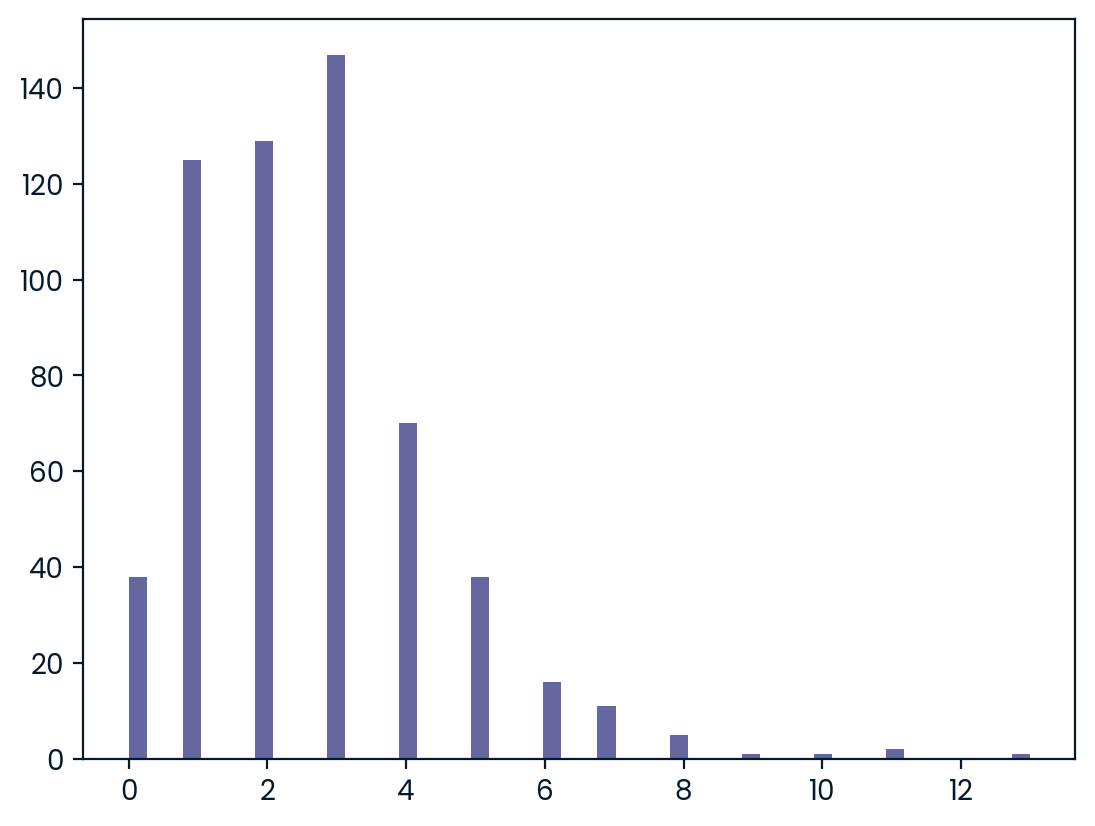

In [61]:
# Determining if the data is normally distributed
import matplotlib.pyplot as plt
plt.hist(data["total_score"], bins = 50)

scores = data["total_score"]

from scipy.stats import kstest, shapiro
# Kolmogorov-Smirnov test
ks_stat, ks_p_value = kstest(scores, 'norm', args=(scores.mean(), scores.std()))
print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat}, P-value = {ks_p_value}")

# Shapiro-Wilk test
shapiro_stat, shapiro_p_value = shapiro(scores)
print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat}, P-value = {shapiro_p_value}")

# Data is not normally distributed, need to adopt a non-parametrict test: Wilcoxon-Mann-Whitney test of two groups

In [62]:
# Using Wilcoxon-Mann-Whitney test of two groups
test_data = data.pivot(columns = "gender", values = "total_score")
alpha = 0.1

import pingouin
results = pingouin.mwu(x = test_data["women"],
                y = test_data["men"],
                alternative = "greater")
print(results)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


In [63]:
p_val = results["p-val"].values[0]
result = "reject"

result_dict = {"p_val": p_val, "result": result}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
